# 图像直方图

# 1. 图像直方图简介

① 图像直方图是把图像变为**灰度图**，分成一个一个像素点的值进行**统计**，如下图左所示。

calculate the image histograms

② 直方图统计函数 cv2.calcHist(images,channels,mask,histSize,ranges)

- images：原图像的图像格式为 uint8 或 ﬂoat32。当传入图像时应该用**中括号 [] **来传入，例如[img]
- channels：同样用**中括号**来传入，它会告诉函数统幅的哪幅灰度图的直方图。如果传入的图像是**灰度图**它的值就是 [0]，如果是**彩色图像**，那么传入的参数可以是 [0]、[1]、[2]，它们分别对应着 B、G、R 通道，每个通道的图像都是灰度图。 
- mask：掩模图像。统计**整幅图像**的直方图时就把它设为**None**。但是如果你想统计图像的某一部分区域的直方图的，你就制作一个掩模图像并使用它。
- histSize：BIN 的数目。也应用中括号括来（每个维度中的直方图大小）
- ranges: 统计的像素值范围，常为 [0-256]。 

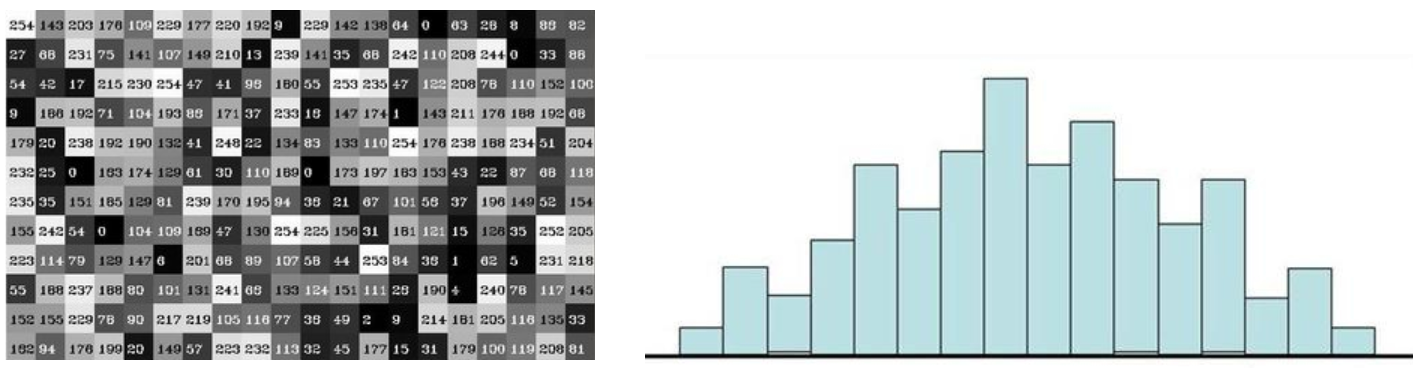

# 2. 图像直方图统计

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt # Matplotlib 是 RGB
%matplotlib inline

def cv_show(img,name):
    cv2.imshow(name,img)
    cv2.waitKey()
    cv2.destroyAllWindows()

(207000,)


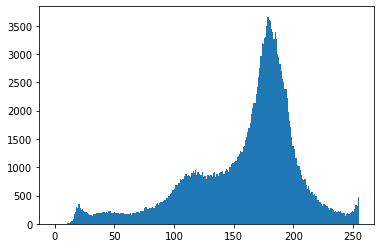

In [5]:
img = cv2.imread('01_Picture/01_Cat.jpg',0) # 0 表示灰度图
print((img.ravel()).shape) # img.ravel()将 img 拉成一维数组
plt.hist(img.ravel(),256)  # 使用matplotlib绘制灰度图对应的直方图
plt.show()

(256, 1)
b
(256, 1)
g
(256, 1)
r


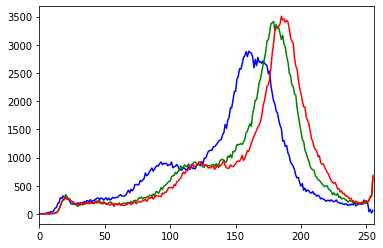

In [6]:
img = cv2.imread('01_Picture/01_Cat.jpg')
color = ('b','g','r')
for i,col in enumerate(color):
    # calcHist函数对应各个参数：images, channels, mask, histSize, ranges
    histr = cv2.calcHist([img],[i],None,[256],[0,256]) # 使用opencv计算出彩色三通道对应的直方图数据
    print(histr.shape)
    print(col)
    plt.plot(histr,color=col) # 使用matplotlib绘制法线图
    plt.xlim([0,256])

# 3. 图像掩码区域

In [7]:
img = cv2.imread('01_Picture/01_Cat.jpg',0)
cv_show(img,'img')
print(img.shape[:2])
mask = np.zeros(img.shape[:2],np.uint8) # 创建掩码区域
print(mask.shape)
mask[100:300,100:400] = 255 # 设置掩码中心区域为白色
cv_show(mask,'mask')
masked_img = cv2.bitwise_and(img,img,mask=mask) # 与操作，得到masked_img图像
cv_show(masked_img,'masked_img')

(414, 500)
(414, 500)


# 4. 图像掩码直方图

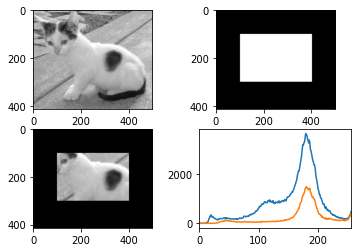

In [5]:
hist_full = cv2.calcHist([img],[0],None,[256],[0,256]) # 不带掩码统计直方图
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256]) # 带上掩码统计直方图
plt.subplot(221), plt.imshow(img,'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img,'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask) # 掩码对应的部分区域的直方图的量要小一些      
plt.xlim([0,256])
plt.show()

# 5. 直方图均衡化

① 直方图均衡化：一般可以用来提升图片的亮度。

② 直方图均衡前是一个瘦高的统计图，直方图均衡后是一个矮胖的统计图。

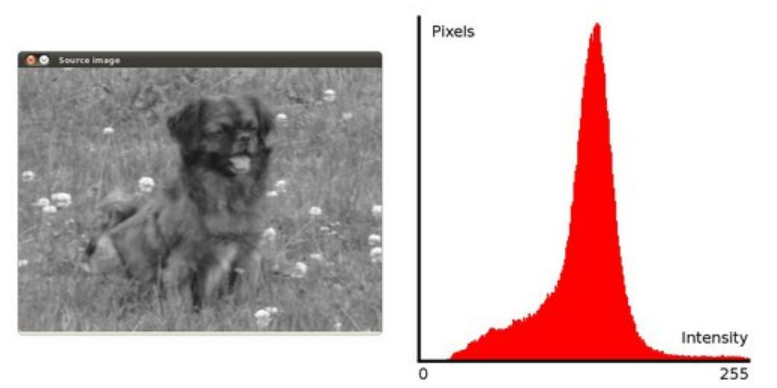

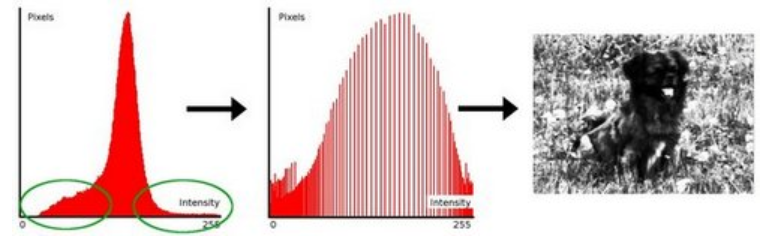

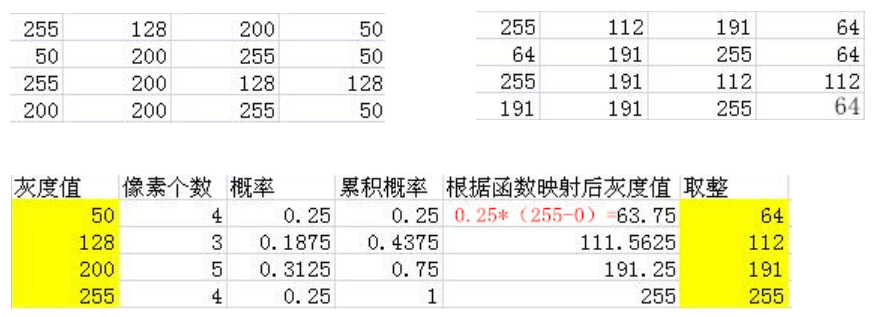

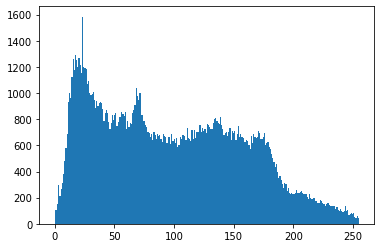

In [13]:
img = cv2.imread('01_Picture/16_Clahe.jpg',0)
plt.hist(img.ravel(),256)
plt.show()

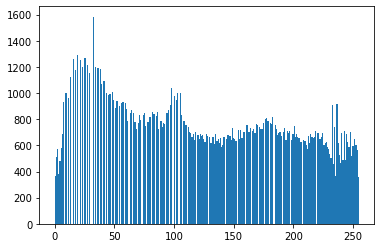

In [14]:
equ = cv2.equalizeHist(img) # 直方图均衡化
plt.hist(equ.ravel(),256) # 使用的是plt来展示直方图
plt.show()

In [11]:
res = np.hstack((img,equ))
cv_show(res,'res')

整体图片进行均衡化
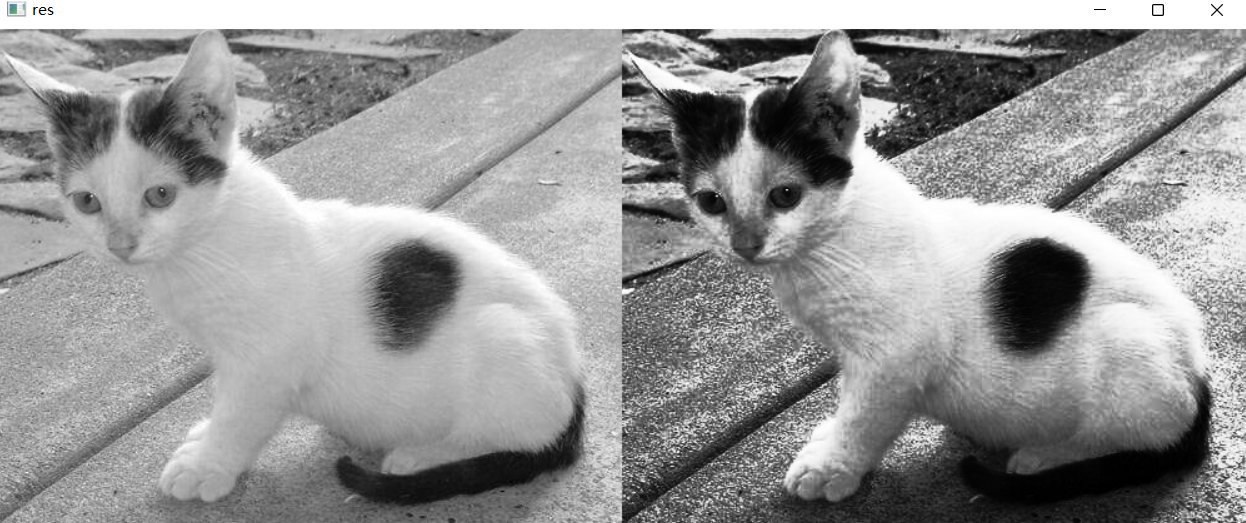

# 6. 自适应直方图均衡化

① 如上图所示，直方图均衡化，人脸石膏本来有一些特征，可能由于**直方图均衡**导致**丢失一些细节**。所以可能**切分成几个小块**，**局部做直方图均衡化**，会比较好。

② 切分成几个小块之后，可能会导致一个现象，**每个格子都会产生一个边界**，opencv是对每个**格子的边界**进行**线性插值处理**。

③ **直方图均衡化函数**：cv2.createCLAHE(clipLimit,tileGridSize)
 - clipLimit 颜色**对比度的阈值**。
 - titleGridSize 进行像素均衡化的**网格大小**，即在多少网格下进行直方图的均衡化操作。

In [15]:
img = cv2.imread('01_Picture/16_Clahe.jpg',0)
clahe = cv2.createCLAHE(clipLimit=2.0,tileGridSize=(8,8)) # 自适应均衡化方法生成出来    
res_clahe = clahe.apply(img) # 方法应用到输入图片当中
res = np.hstack((img,equ,res_clahe)) # 横向展示图像
cv_show(res,'res')

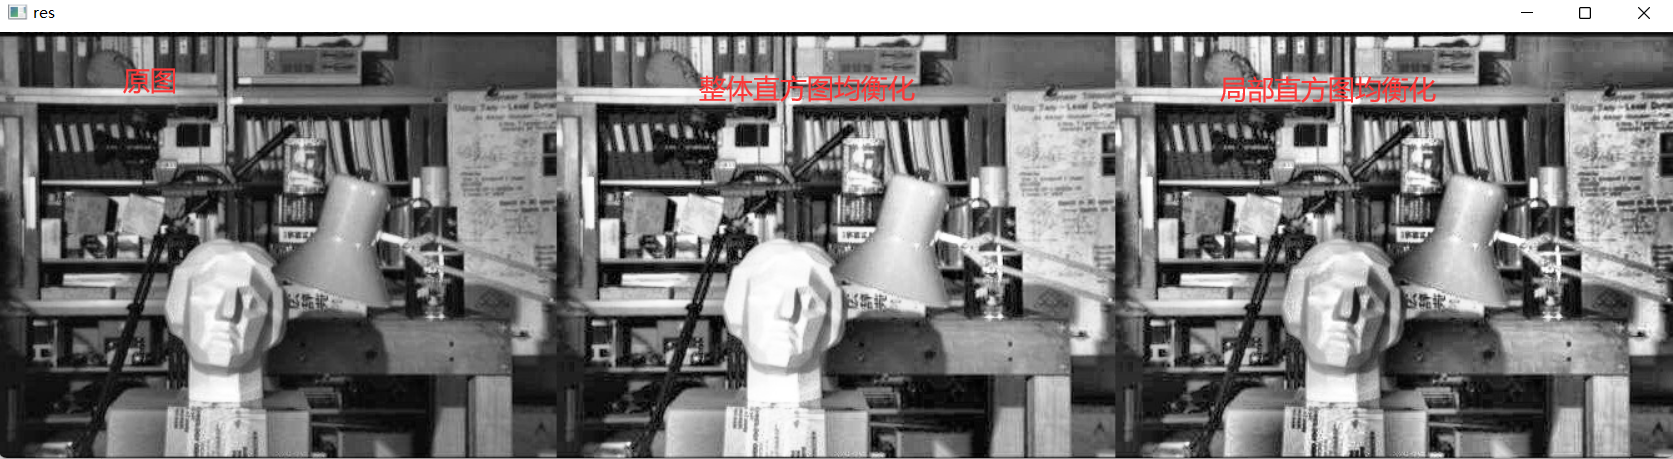